In [73]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
import numpy as np


def split_sequences(sequences, n_steps):
    x, y = list(), list()
    for i in range(len(sequences)):
        
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
    y.append(seq_y)
    return array(X), array(y)


In [74]:
df = pd.read_excel("C:/Users/Dell/Desktop/Flipr ML/Train_dataset.xlsx", sheet_name = "Diuresis_TS")

In [75]:
df=df.drop('people_ID',axis=1)

In [76]:
df=df.iloc[:,:].values

In [77]:
df

array([[ 441.      ,  544.2     ,  669.64    , ..., 1002.2416  ,
        1215.68992 , 1472.627904],
       [ 151.      ,  197.2     ,  253.24    , ...,  399.9256  ,
         492.91072 ,  606.892864],
       [ 416.      ,  515.2     ,  632.44    , ...,  947.7736  ,
        1150.32832 , 1395.793984],
       ...,
       [ 177.      ,  228.4     ,  288.28    , ...,  448.4632  ,
         551.15584 ,  676.787008],
       [ 352.      ,  438.4     ,  542.68    , ...,  814.6792  ,
         990.61504 , 1204.138048],
       [ 181.      ,  230.2     ,  290.44    , ...,  455.2936  ,
         559.35232 ,  686.622784]])

In [78]:
df

array([[ 441.      ,  544.2     ,  669.64    , ..., 1002.2416  ,
        1215.68992 , 1472.627904],
       [ 151.      ,  197.2     ,  253.24    , ...,  399.9256  ,
         492.91072 ,  606.892864],
       [ 416.      ,  515.2     ,  632.44    , ...,  947.7736  ,
        1150.32832 , 1395.793984],
       ...,
       [ 177.      ,  228.4     ,  288.28    , ...,  448.4632  ,
         551.15584 ,  676.787008],
       [ 352.      ,  438.4     ,  542.68    , ...,  814.6792  ,
         990.61504 , 1204.138048],
       [ 181.      ,  230.2     ,  290.44    , ...,  455.2936  ,
         559.35232 ,  686.622784]])

In [79]:
n_steps = 3

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
df_X=df[:,:-1]

In [82]:
df_Y=df[:,-1]

In [83]:
df_Y

array([1472.627904,  606.892864, 1395.793984, ...,  676.787008,
       1204.138048,  686.622784])

In [84]:
df_X=df_X.transpose()


In [85]:
X, Y = split_sequences(df_X, n_steps)

In [86]:
n_features = X.shape[2]

print(X.shape[2])
print(X)

10714
[[[ 441.      151.      416.     ...  177.      352.      181.    ]
  [ 544.2     197.2     515.2    ...  228.4     438.4     230.2   ]
  [ 669.64    253.24    632.44   ...  288.28    542.68    290.44  ]]

 [[ 544.2     197.2     515.2    ...  228.4     438.4     230.2   ]
  [ 669.64    253.24    632.44   ...  288.28    542.68    290.44  ]
  [ 821.368   321.688   776.728  ...  362.136   665.816   366.328 ]]

 [[ 669.64    253.24    632.44   ...  288.28    542.68    290.44  ]
  [ 821.368   321.688   776.728  ...  362.136   665.816   366.328 ]
  [1002.2416  399.9256  947.7736 ...  448.4632  814.6792  455.2936]]]


In [87]:
Y

array([[ 821.368  ,  321.688  ,  776.728  , ...,  362.136  ,  665.816  ,
         366.328  ],
       [1002.2416 ,  399.9256 ,  947.7736 , ...,  448.4632 ,  814.6792 ,
         455.2936 ],
       [1215.68992,  492.91072, 1150.32832, ...,  551.15584,  990.61504,
         559.35232]])

In [88]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, Y, epochs=400, verbose=0)



In [89]:
x_input=df_X[3:7,:]

In [90]:
x_input

array([[ 821.368  ,  321.688  ,  776.728  , ...,  362.136  ,  665.816  ,
         366.328  ],
       [1002.2416 ,  399.9256 ,  947.7736 , ...,  448.4632 ,  814.6792 ,
         455.2936 ],
       [1215.68992,  492.91072, 1150.32832, ...,  551.15584,  990.61504,
         559.35232]])

In [91]:
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [92]:
yhat

array([[1512.2736 ,  605.60596, 1430.719  , ...,  679.61566, 1230.4246 ,
         687.53955]], dtype=float32)

In [93]:
df_Y

array([1472.627904,  606.892864, 1395.793984, ...,  676.787008,
       1204.138048,  686.622784])

In [94]:
len(yhat[0])

10714

In [95]:
len(df_Y)

10714

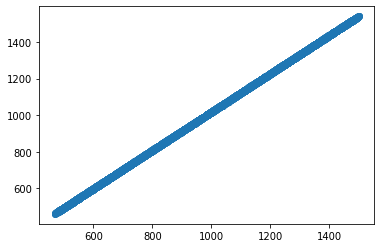

In [96]:
from matplotlib import pyplot as plt
plt.scatter(df_Y,yhat[0])

In [97]:
yhat.shape

(1, 10714)

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(df_Y, yhat[0])

16.97838367565689